# BMSC 2025 Workshop Data

### Temperature data from CTD and acoustic mounts at Folger Deep and Folger Pinnacle.

In [231]:
import pandas as pd
import onc
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

load_dotenv()
token = os.getenv("ONC_TOKEN")

"""
Fetches scalar temperature data using the ONC Python SDK for a given location, device category, and time window.
Plots data.
"""

def plot_temp_by_device_cat(start: str, end: str, locationCode: str, deviceCategoryCode: str) -> None:

    # Create ONC client using the SDK
    my_onc = onc.ONC(token)

    params = {
        "locationCode": locationCode,
        "deviceCategoryCode": deviceCategoryCode,
        "sensorCategoryCodes": "temperature",
        "dateFrom": start,
        "dateTo" : end
    }

    # JSON response from ONC
    result = my_onc.getScalardata(params)

    # extract the sensor and it's data fields
    temp_sensor = result["sensorData"][0]

    times = temp_sensor["data"]["sampleTimes"]
    temp_values = temp_sensor["data"]["values"]
    flags = temp_sensor["data"]["qaqcFlags"] # flags for quality assurance

    start_dt = pd.to_datetime(start).strftime("%b %d, %Y %H:%M")
    end_dt = pd.to_datetime(end).strftime("%b %d, %Y %H:%M")

    # populate dataframe using Pandas
    df = pd.DataFrame({
        # syntax: "label": variable
        "timestamp": pd.to_datetime(times), # convert strings to datetime objects
        "values": temp_values,
        "qaqcFlags": flags
    })
    
    # plot the dataframe using matplotlib
    plt.figure(figsize=(12, 6))

    plt.plot(df["timestamp"], df["values"], linewidth=0.2, label="Temperature (°C)")

    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.title(f"{deviceCategoryCode} at {locationCode}\n{start_dt} to {end_dt}")
    plt.grid(True)
    plt.legend()

    # Format x-axis timestamps
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M'))
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()

In [232]:
"""
Fetches scalar temperature data using the ONC Python SDK for a given device ID and time window.
Plots data. *Location required to title the plot.

"""

def plot_temp_by_device_id(start: str, end: str, locationCode: str, deviceCode: str) -> None:

    # Create ONC client using the SDK
    my_onc = onc.ONC(token)

    params = {
        "deviceCode": deviceCode,
        "sensorCategoryCodes": "temperature",
        "dateFrom": start,
        "dateTo" : end
    }

    # JSON response from ONC
    result = my_onc.getScalardata(params)

    # error handle if there is no data returned
    if not result or "sensorData" not in result or result["sensorData"] is None or len(result["sensorData"]) == 0:
        print(f"No data returned for device {deviceCode} between {start} and {end}.")
        return
        
    else:
        # extract the sensor and it's data fields
        temp_sensor = result["sensorData"][0]

        times = temp_sensor["data"]["sampleTimes"]
        temp_values = temp_sensor["data"]["values"]
        flags = temp_sensor["data"]["qaqcFlags"] # flags for quality assurance

        # reformat dates
        start_dt = pd.to_datetime(start).strftime("%b %d, %Y %H:%M")
        end_dt = pd.to_datetime(end).strftime("%b %d, %Y %H:%M")

        # populate dataframe using Pandas
        df = pd.DataFrame({
            # syntax: "label": variable
            "timestamp": pd.to_datetime(times), # convert strings to datetime objects
            "values": temp_values,
            "qaqcFlags": flags
        })
        
        # plot the dataframe using matplotlib
        plt.figure(figsize=(12, 6))

        plt.plot(df["timestamp"], df["values"], linewidth=1, label="Temperature (°C)")

        plt.xlabel("Time")
        plt.ylabel("Temperature (°C)")
        plt.title(f"{deviceCode} at {locationCode}\n{start_dt} to {end_dt}")
        plt.grid(True)
        plt.legend()

        # Format x-axis timestamps
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M'))
        plt.gcf().autofmt_xdate()

        plt.tight_layout()
        plt.show()
    


### Plotting Temperature by Induvidual Devices

#### Mount: Nortek Aquadopp Profiler AQD 2958 at Fogler Pinnacle

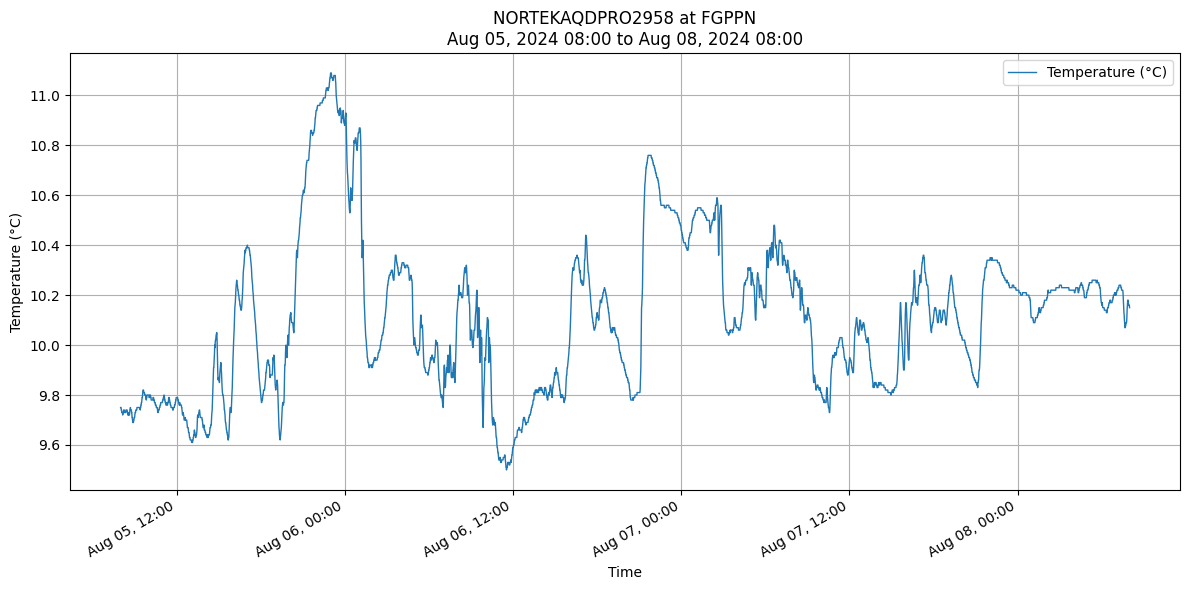

In [233]:
dateFrom = "2024-08-05T08:00:00.000Z"
dateTo = "2024-08-08T08:00:00.000Z"

plot_temp_by_device_id(dateFrom, dateTo, "FGPPN", "NORTEKAQDPRO2958") # mount: Nortek Aquadopp Profiler AQD 2958 @ pinnacle

#### CTD: Sea-Bird SeaCAT SBE19plus V2 7770 at Fogler Pinnacle

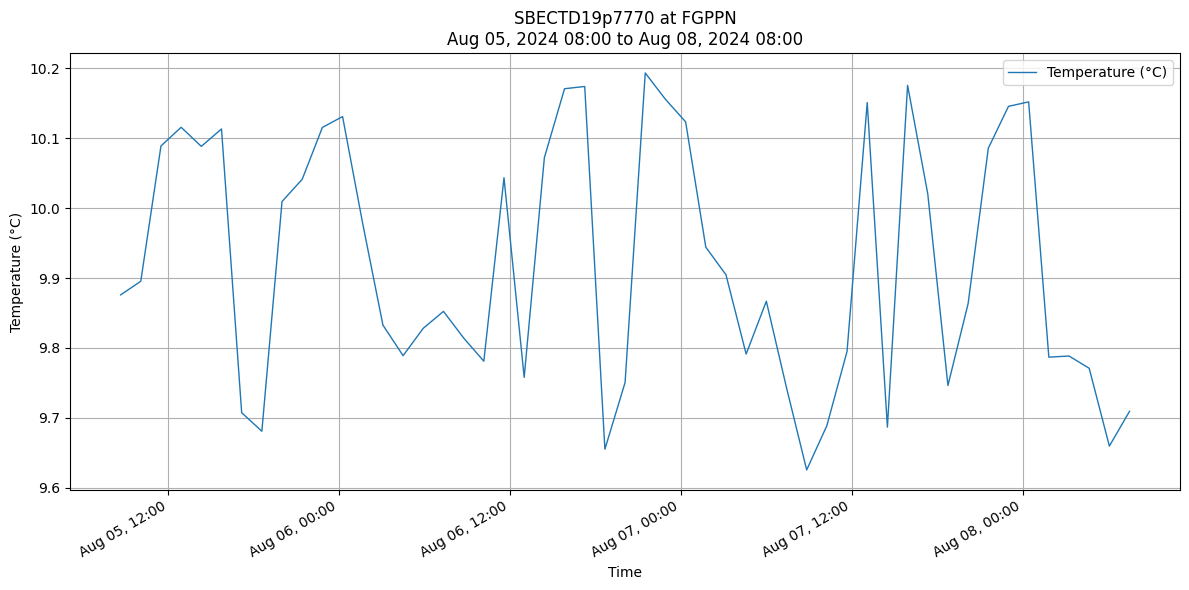

In [234]:
plot_temp_by_device_id(dateFrom, dateTo, "FGPPN", "SBECTD19p7770") # CTD: Sea-Bird SeaCAT SBE19plus V2 7770 @ pinnacle

#### Mount: RDI Workhorse Monitor ADCP 300 kHz (9273) at Folger Deep

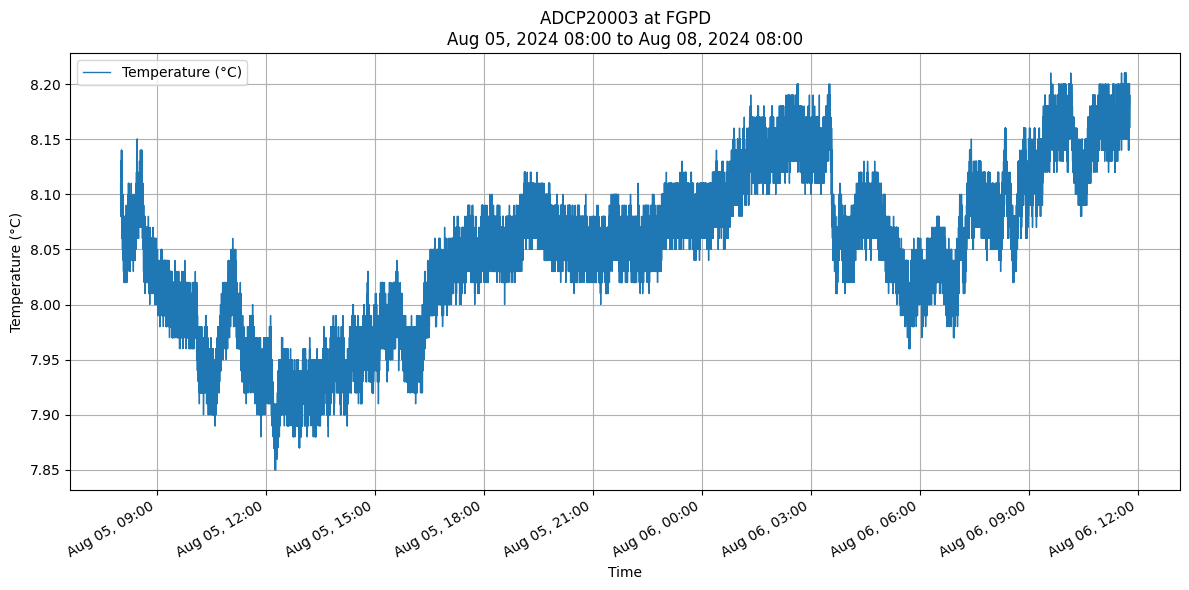

In [235]:
plot_temp_by_device_id(dateFrom, dateTo, "FGPD", "ADCP20003") # RDI Workhorse Monitor ADCP 300 kHz (9273) @ deep

#### CTD: Sea-Bird SeaCAT SBE19plus V2 7026 at Folger Deep

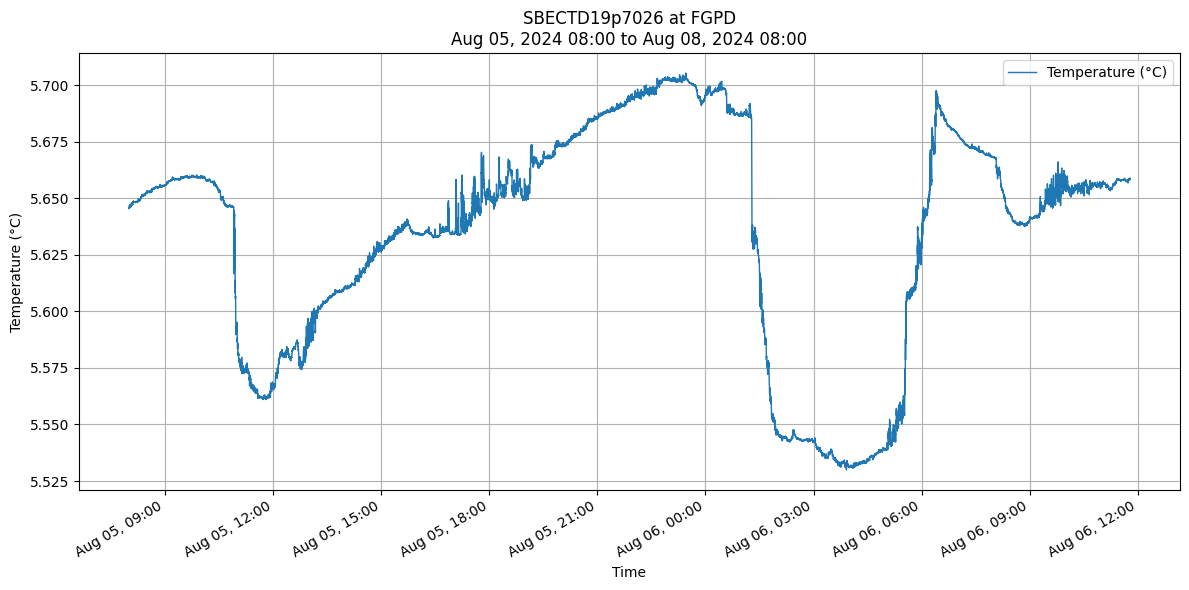

In [236]:
plot_temp_by_device_id(dateFrom, dateTo, "FGPD", "SBECTD19p7026") # Sea-Bird SeaCAT SBE19plus V2 7026 @ deep

### Plotting Temperature by Device Categories

#### CTD: CTD at Folger Deep

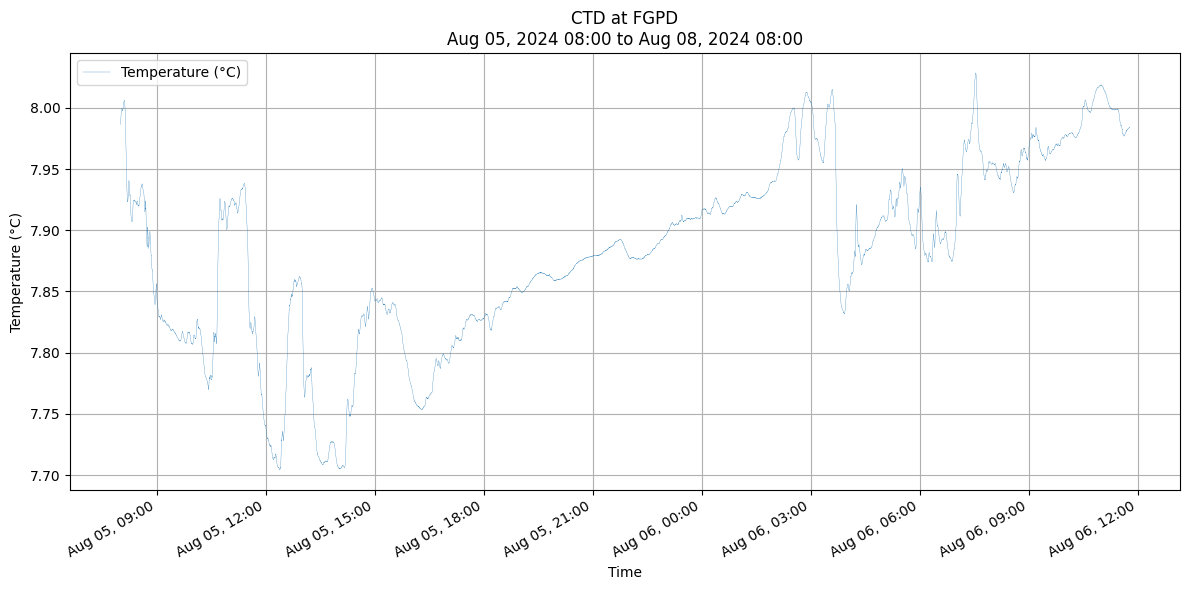

In [237]:
plot_temp_by_device_cat(dateFrom, dateTo, "FGPD", "CTD") # CTD @ deep

#### Mount: Acoustic Doppler Current Profiler 300 kHz at Folger Deep

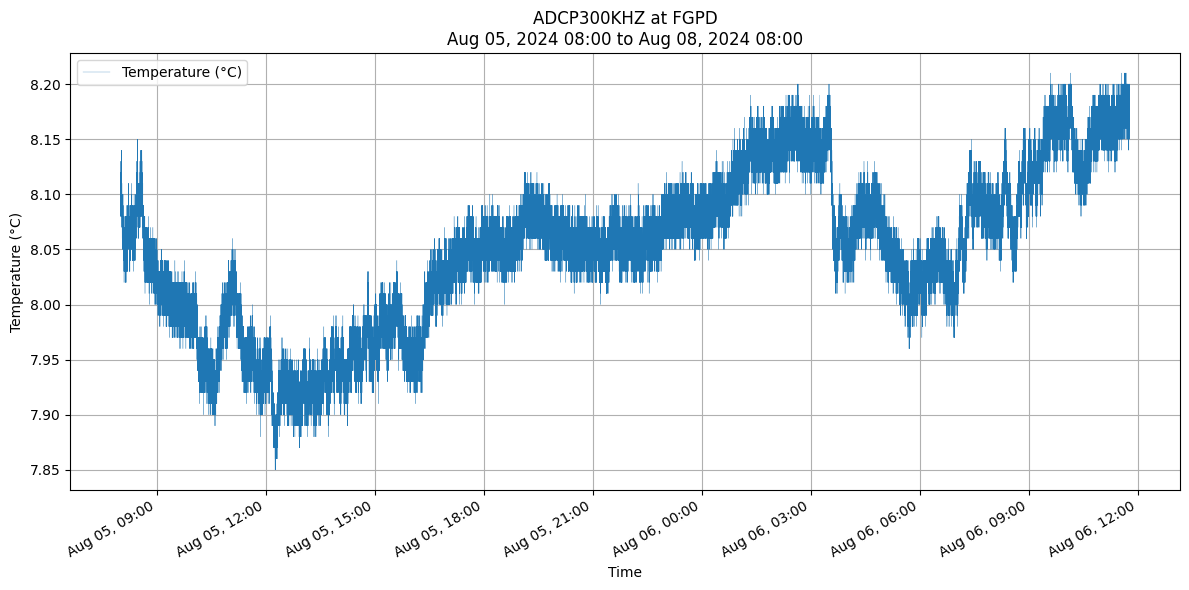

In [238]:
plot_temp_by_device_cat(dateFrom, dateTo, "FGPD", "ADCP300KHZ") # Acoustic Doppler Current Profiler 300 kHz @ deep

#### CTD: CTD at Folger Pinnacle

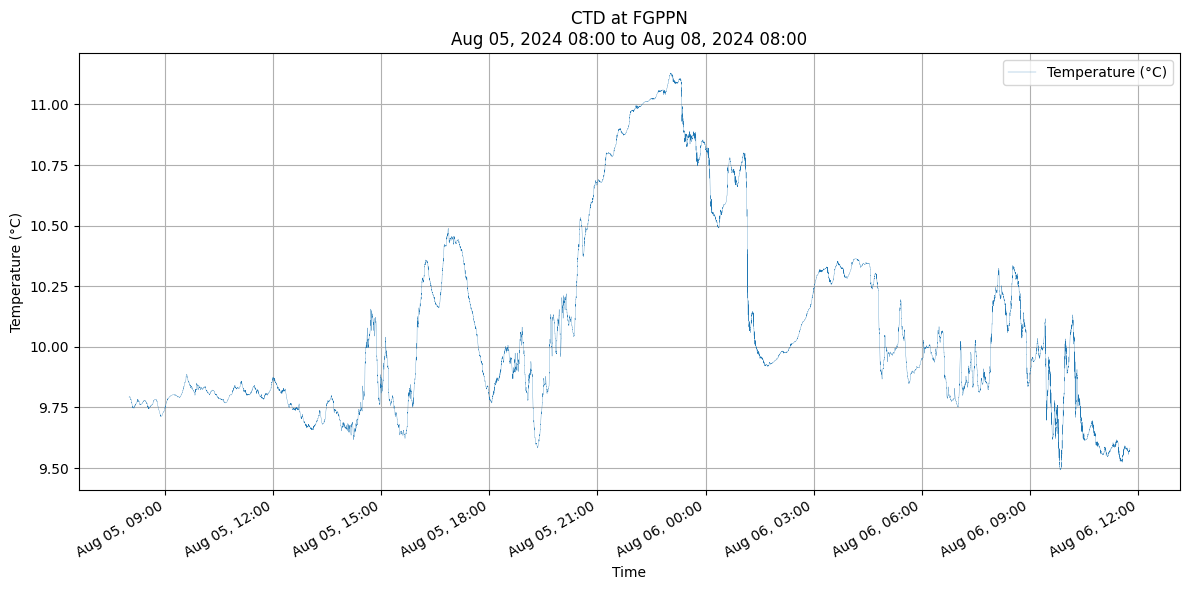

In [239]:
plot_temp_by_device_cat(dateFrom, dateTo, "FGPPN", "CTD") # CTD @ pinnacle

#### Mount: Acoustic Doppler Current Profiler 600 kHz at Folger Pinnacle

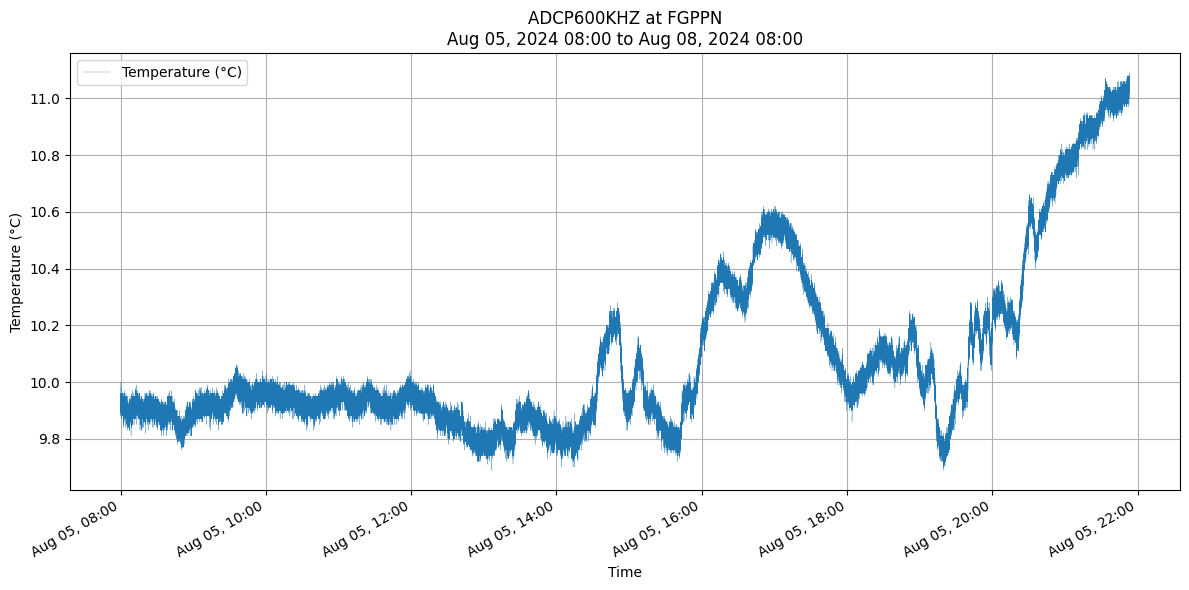

In [240]:
plot_temp_by_device_cat(dateFrom, dateTo, "FGPPN", "ADCP600KHZ") # acoustic profilers @ pinnacle